# Logistic Regression

# Data Preprocessing

## Importing the libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [35]:
winedata = pd.read_csv('winequality-red.csv',sep=";")
winedata['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [36]:
def qualitifier(x):
    if x>6:
        x = 1
    else:
        x = 0
    return x
winedata['quality'] = winedata['quality'].apply(qualitifier)
winedata['quality'].value_counts


<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64>

In [37]:
winedata['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [38]:
X = winedata.iloc[:,:-1].values
y = winedata.iloc[:,-1].values

In [39]:
print(X)
print(X.shape)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]
(1599, 11)


In [40]:
print(y)
print(y.shape)

[0 0 0 ... 0 0 0]
(1599,)


## Splitting the dataset into the Training set and Test set

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [42]:
X_train

array([[ 8.4  ,  0.745,  0.11 , ...,  3.19 ,  0.82 ,  9.6  ],
       [ 7.6  ,  0.43 ,  0.29 , ...,  3.4  ,  0.64 ,  9.5  ],
       [ 8.4  ,  0.56 ,  0.04 , ...,  3.22 ,  0.44 ,  9.6  ],
       ...,
       [ 7.9  ,  0.57 ,  0.31 , ...,  3.29 ,  0.69 ,  9.5  ],
       [13.   ,  0.47 ,  0.49 , ...,  3.3  ,  0.68 , 12.7  ],
       [ 9.8  ,  0.98 ,  0.32 , ...,  3.25 ,  0.48 ,  9.4  ]])

In [43]:
X_test

array([[10.8  ,  0.47 ,  0.43 , ...,  3.17 ,  0.76 , 10.8  ],
       [ 8.1  ,  0.82 ,  0.   , ...,  3.36 ,  0.53 ,  9.6  ],
       [ 9.1  ,  0.29 ,  0.33 , ...,  3.26 ,  0.84 , 11.7  ],
       ...,
       [ 7.3  ,  0.365,  0.49 , ...,  3.36 ,  0.78 , 11.   ],
       [15.6  ,  0.685,  0.76 , ...,  2.95 ,  0.68 , 11.2  ],
       [ 7.6  ,  0.43 ,  0.29 , ...,  3.4  ,  0.64 ,  9.5  ]])

In [44]:
Y_train


array([0, 0, 0, ..., 0, 0, 0])

In [45]:
Y_train.shape

(1199,)

In [46]:
Y_test

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [47]:
Y_test.shape

(400,)

In [48]:
X_train.shape

(1199, 11)

## Feature Scaling

In [49]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X_train = ms.fit_transform(X_train)
X_test = ms.fit_transform(X_test)


In [50]:
X_train

array([[0.33035714, 0.42808219, 0.11      , ..., 0.35433071, 0.27607362,
        0.18461538],
       [0.25892857, 0.21232877, 0.29      , ..., 0.51968504, 0.16564417,
        0.16923077],
       [0.33035714, 0.30136986, 0.04      , ..., 0.37795276, 0.04294479,
        0.18461538],
       ...,
       [0.28571429, 0.30821918, 0.31      , ..., 0.43307087, 0.19631902,
        0.16923077],
       [0.74107143, 0.23972603, 0.49      , ..., 0.44094488, 0.19018405,
        0.66153846],
       [0.45535714, 0.5890411 , 0.32      , ..., 0.4015748 , 0.06748466,
        0.15384615]])

In [51]:
X_test

array([[0.56363636, 0.35227273, 0.5443038 , ..., 0.28431373, 0.42574257,
        0.42857143],
       [0.31818182, 0.75      , 0.        , ..., 0.47058824, 0.1980198 ,
        0.21428571],
       [0.40909091, 0.14772727, 0.41772152, ..., 0.37254902, 0.5049505 ,
        0.58928571],
       ...,
       [0.24545455, 0.23295455, 0.62025316, ..., 0.47058824, 0.44554455,
        0.46428571],
       [1.        , 0.59659091, 0.96202532, ..., 0.06862745, 0.34653465,
        0.5       ],
       [0.27272727, 0.30681818, 0.36708861, ..., 0.50980392, 0.30693069,
        0.19642857]])

In [52]:
Y_train

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
Y_test

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [54]:
unique_values, counts = np.unique(Y_train, return_counts=True)

# Print the unique values and their corresponding counts
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 1027
Value: 1, Count: 172


In [55]:
unique_values,counts = np.unique(Y_test,return_counts = True)
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")


Value: 0, Count: 355
Value: 1, Count: 45


## Training the Logistic Regression model on the Training set

In [56]:
from sklearn.linear_model import LogisticRegression
lgreg = LogisticRegression()
lgreg.fit(X_train, Y_train)

LogisticRegression()

In [57]:
y_pred = lgreg.predict(X_test)
print(y_pred)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0]


In [58]:
print(y_pred.shape)


(400,)


In [59]:
print(Y_test.shape)

(400,)


In [60]:
count = 0
for i in range(len(Y_test)):
    if (Y_test[i] == y_pred[i]):
        count = count + 1
print(count)
print(count/len(Y_test))

352
0.88


In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
cm = confusion_matrix(Y_test,y_pred)
print(cm)
print(precision_score(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred))
print(recall_score(Y_test,y_pred))

[[333  22]
 [ 26  19]]
0.4634146341463415
0.88
0.4222222222222222


In [62]:
residuals = Y_test - y_pred
print(residuals)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  1  0  0  0
  0  0  0  0  0  0  0  0  0  0  1  1  0  0 -1  1  0  1 -1 -1  0  0  0  0
  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
  0  0  0  0  0  0  0 -1  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0
  0  1  0  0  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0  1  0  0  0  0  0
  0  0  1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0 -1  0  0
  0  0  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0  1  0  1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  1  0 -1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0 -1  0  0  0 -1  0  0  0  1  0  0  0  0  0

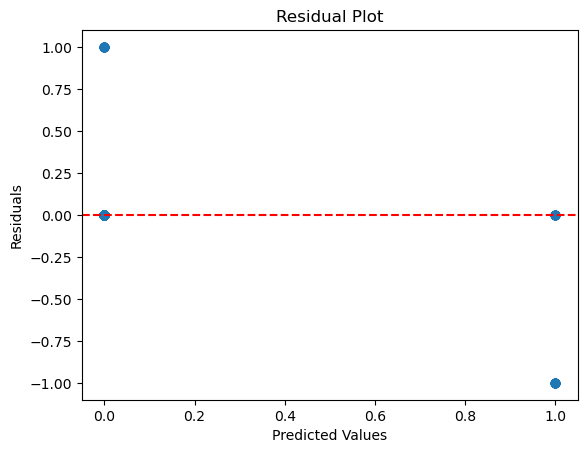

In [63]:
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()